y:Order Item Quantity:

The total quantity of items ordered from a supplier could be used as a target variable to evaluate the supplier's ability to meet quantity requirements.

Regression Models:
Linear reg,
Decision Trees, Random Forest used for predicting continuous variables like profit ratios.

# Data exploration and pre-process:-

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

data = pd.read_csv('/content/drive/MyDrive/Dataset/Supply_Chain_Dataset_New.csv', encoding='latin1', engine='python')

data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country       

In [17]:
#drop unwanted columns
unwanted_columns =["Category Id","Customer Email","Customer Zipcode","Customer Street","Customer Fname","Customer Id","Customer Lname","Customer Segment","Latitude","Longitude","Order Customer Id","order date (DateOrders)","Order Id","Order Item Cardprod Id","Order Item Id","Order Zipcode","Product Card Id","Product Category Id","Product Status","shipping date (DateOrders)"]
data.drop(unwanted_columns, axis=1, inplace=True)

# change object data into int or float

hist_data = data.copy(deep=False)

from sklearn.preprocessing import LabelEncoder
def Change_obj_type(data):
    for column in data.columns:
        if data[column].dtype == type(object):
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column])
    return data
new_data = Change_obj_type(hist_data)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int64  
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  int64  
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Name                  180519 non-null  int64  
 8   Customer City                  180519 non-null  int64  
 9   Customer Country               180519 non-null  int64  
 10  Customer State                 180519 non-null  int64  
 11  Market                         180519 non-null  int64  
 12  Order City                    

**Visualize y vs x to explore destribution:**


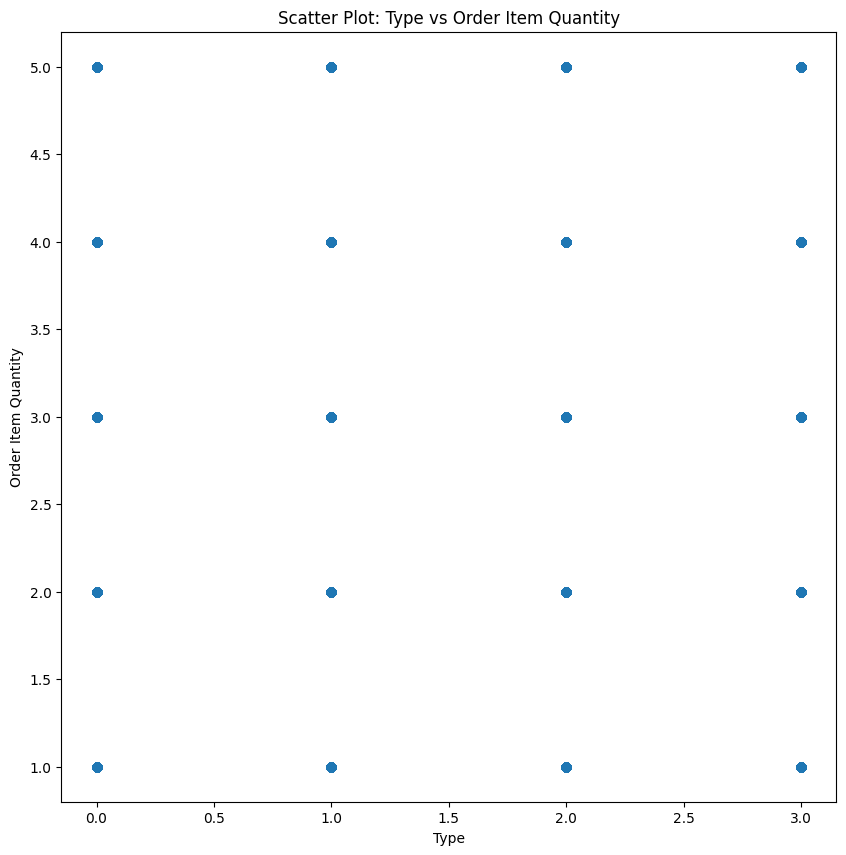

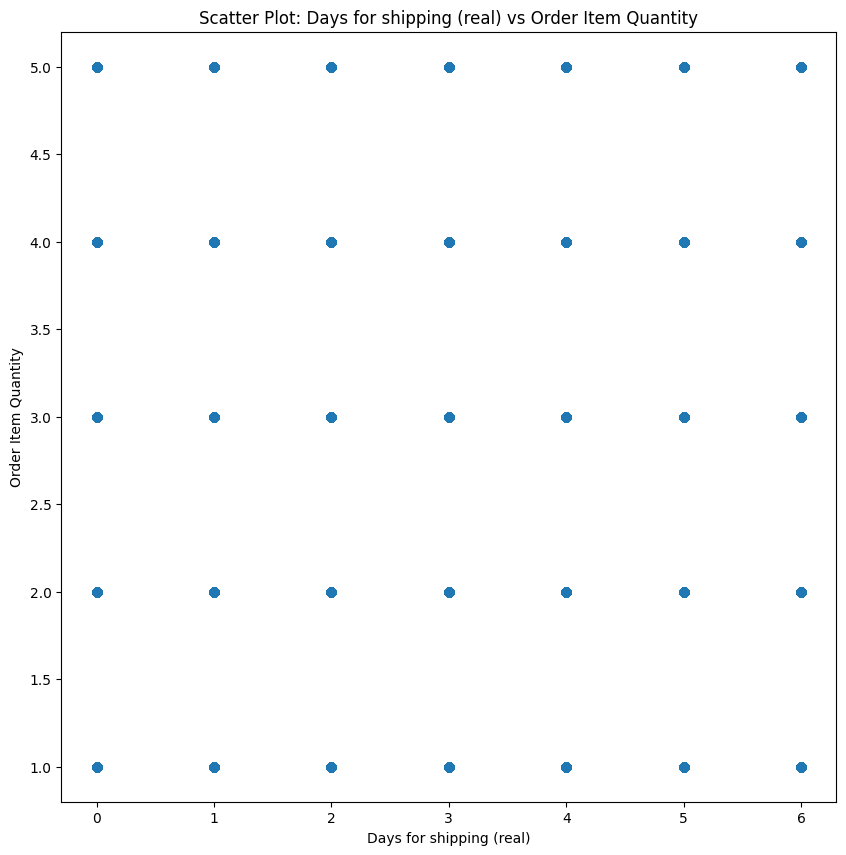

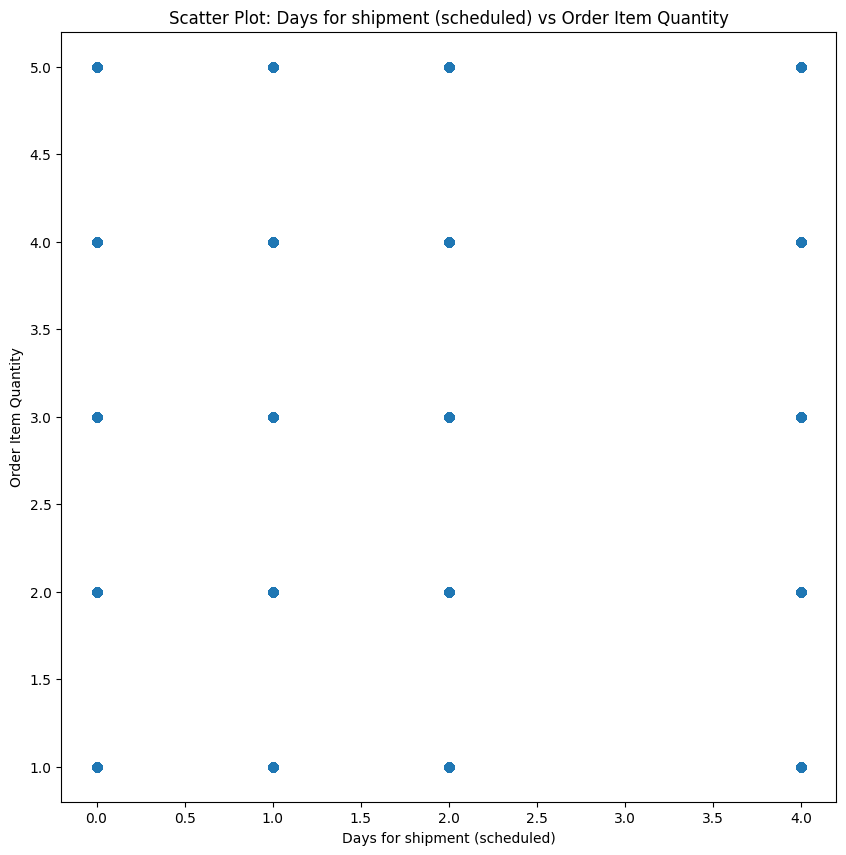

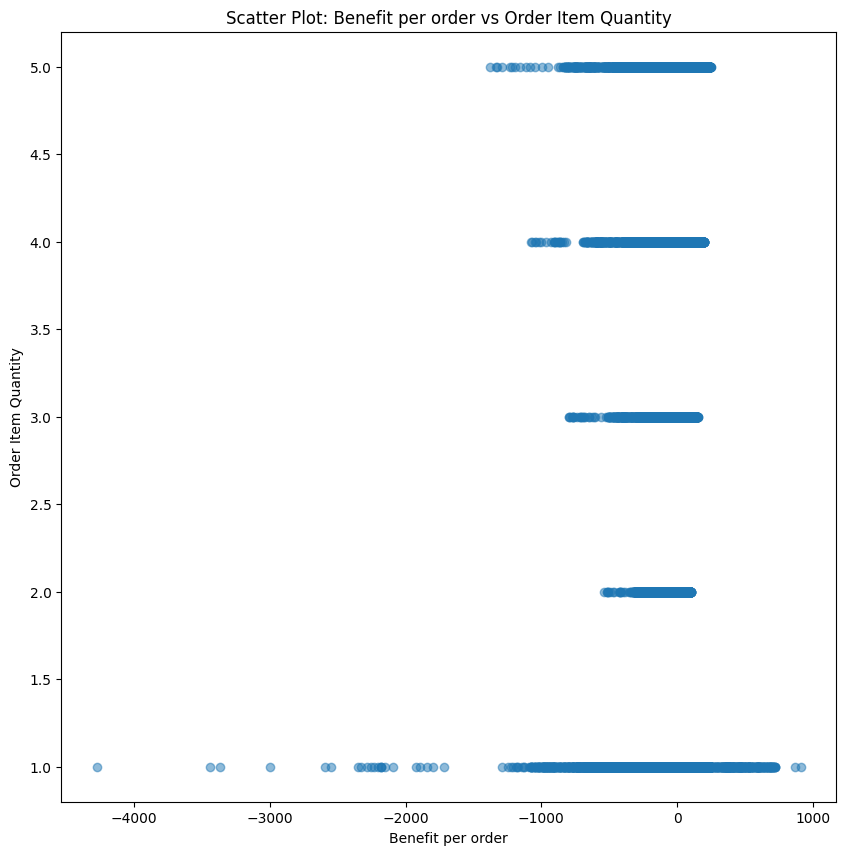

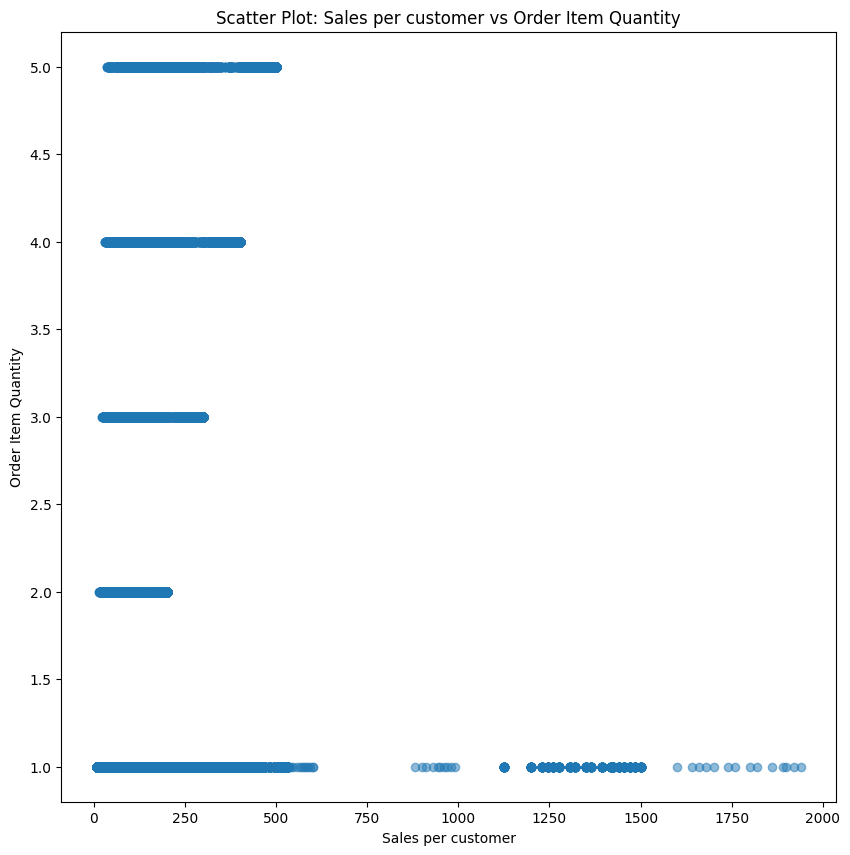

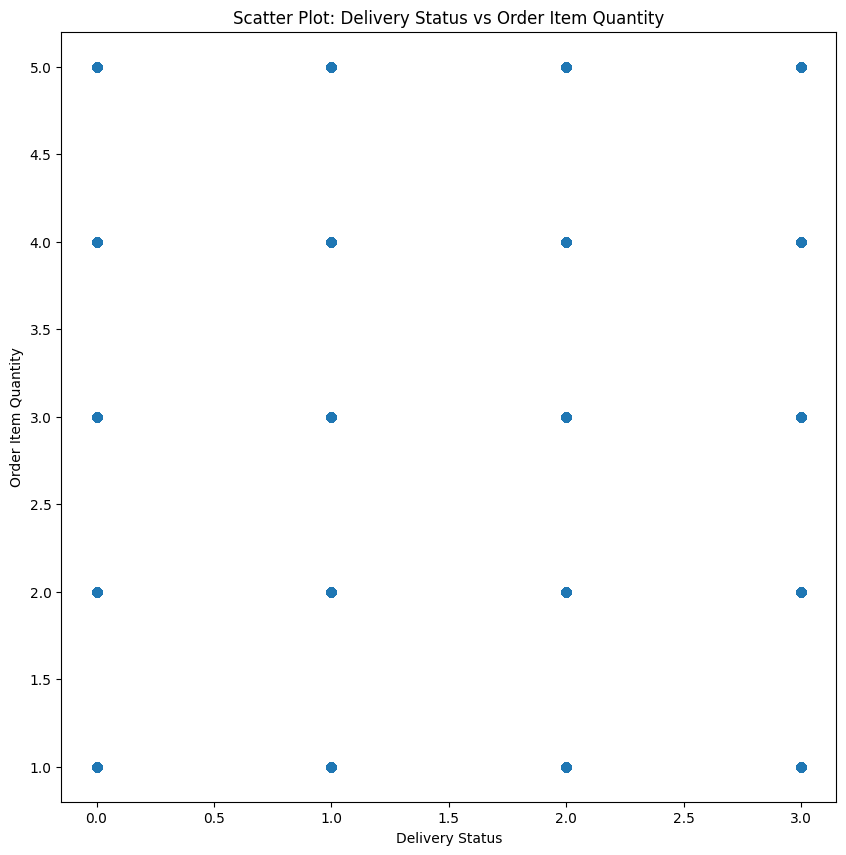

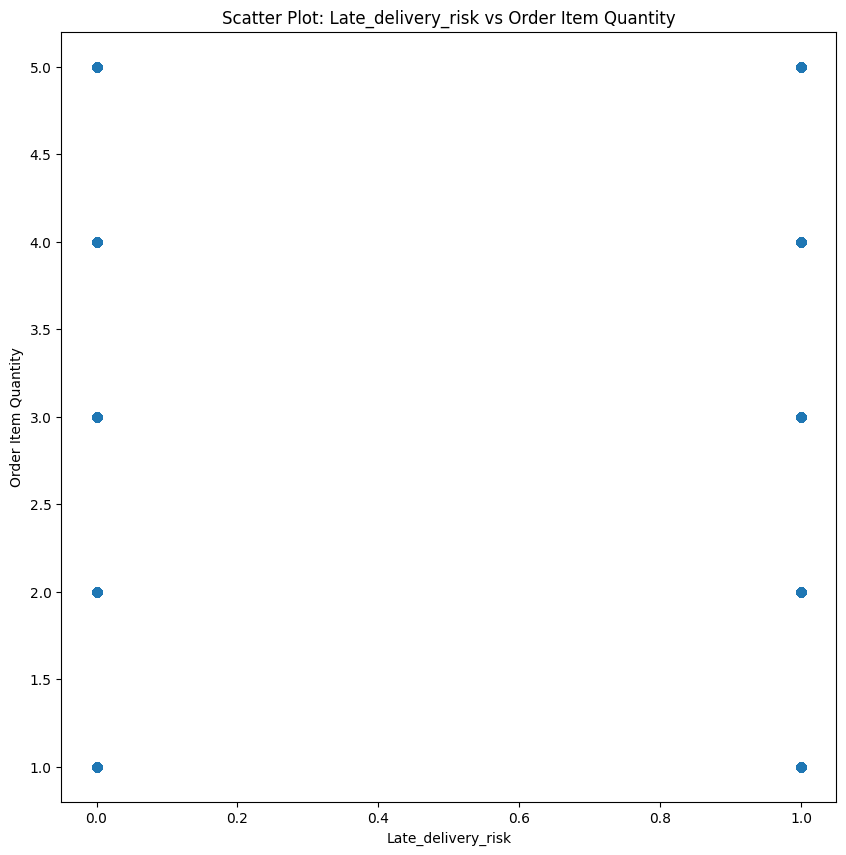

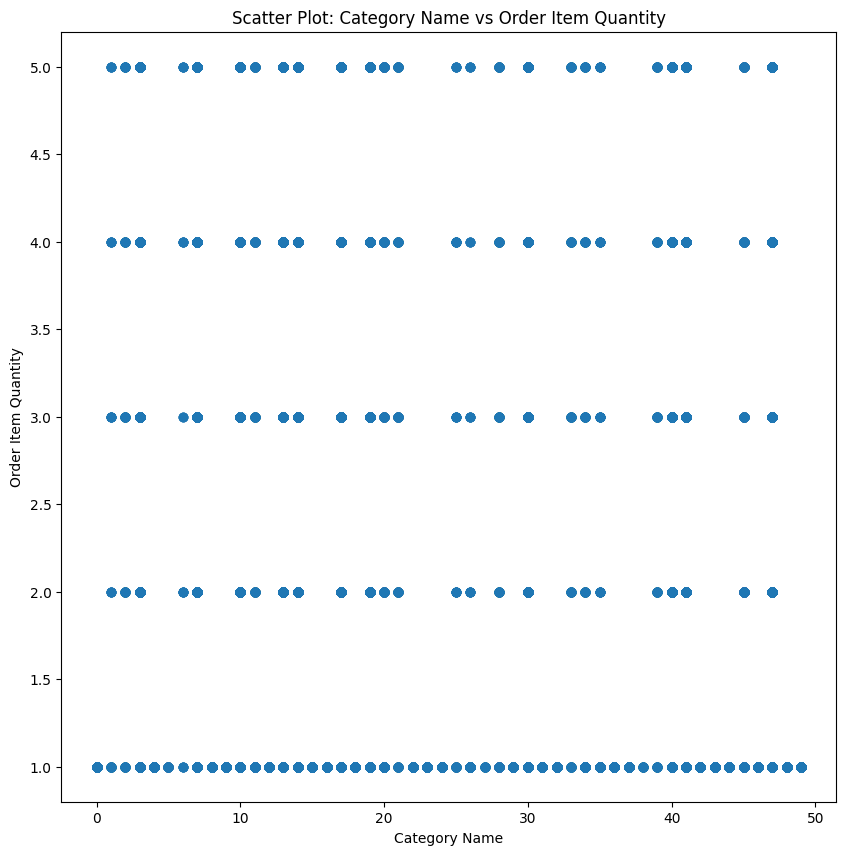

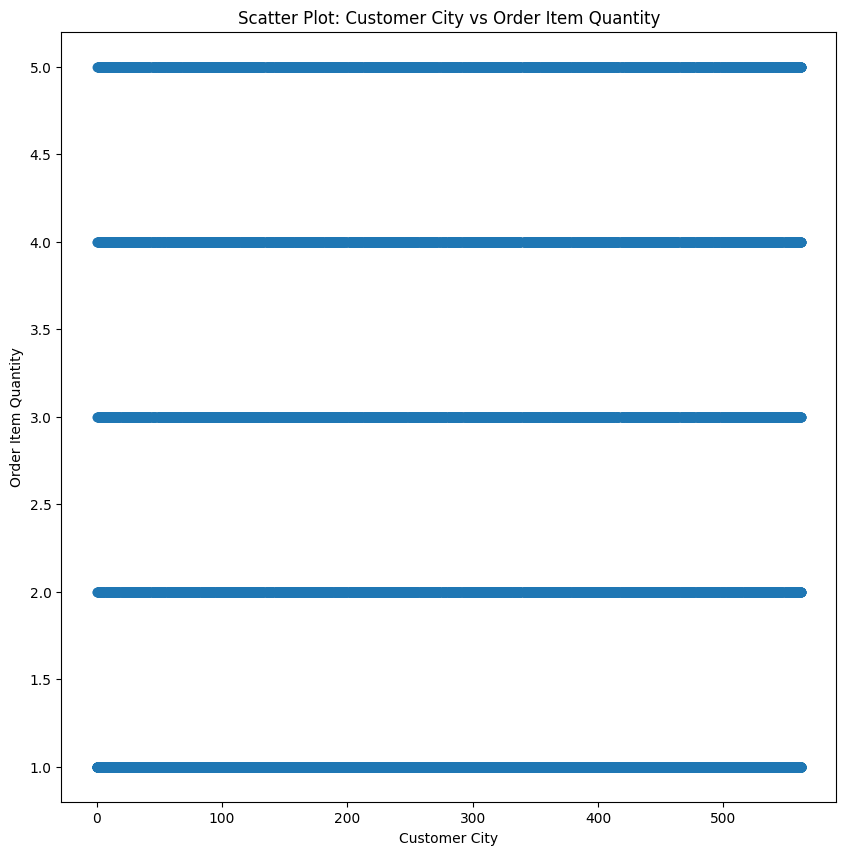

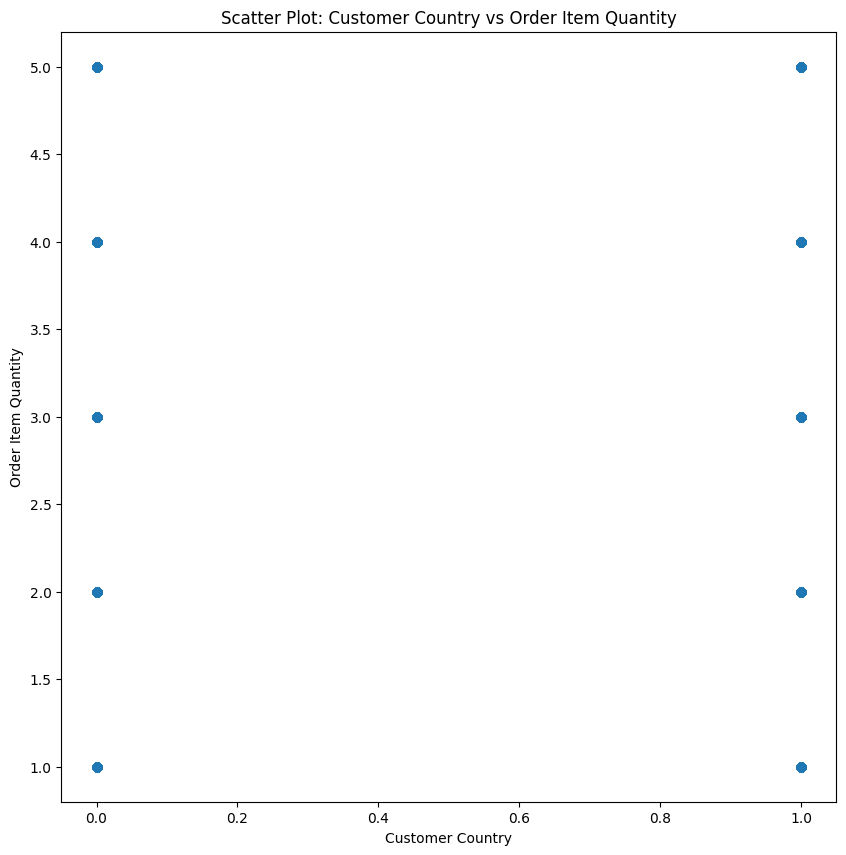

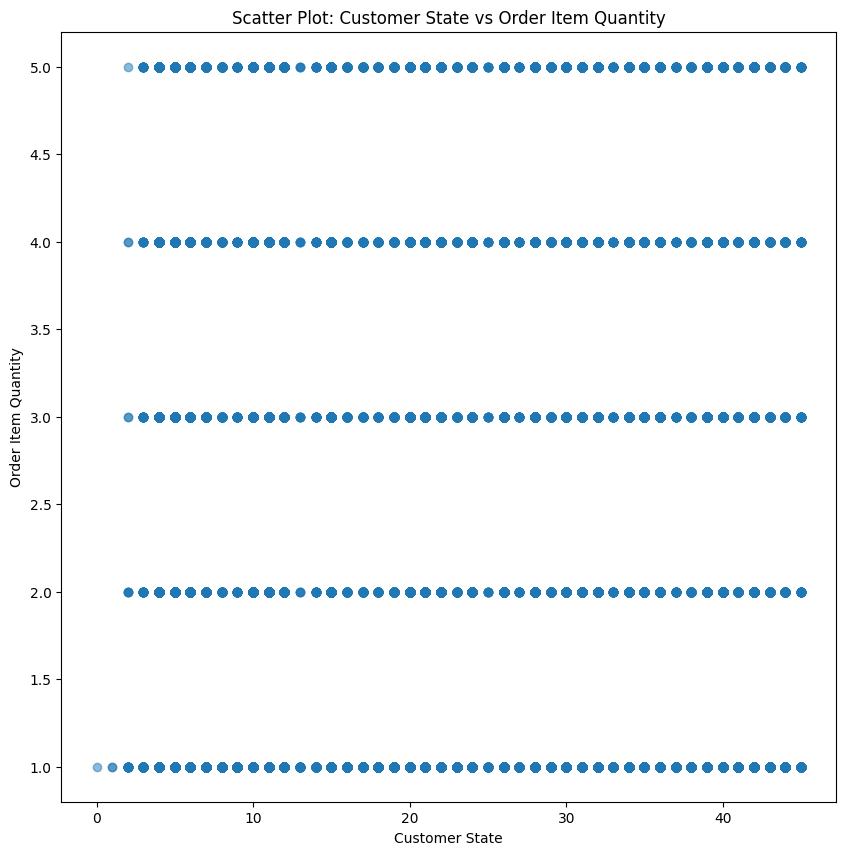

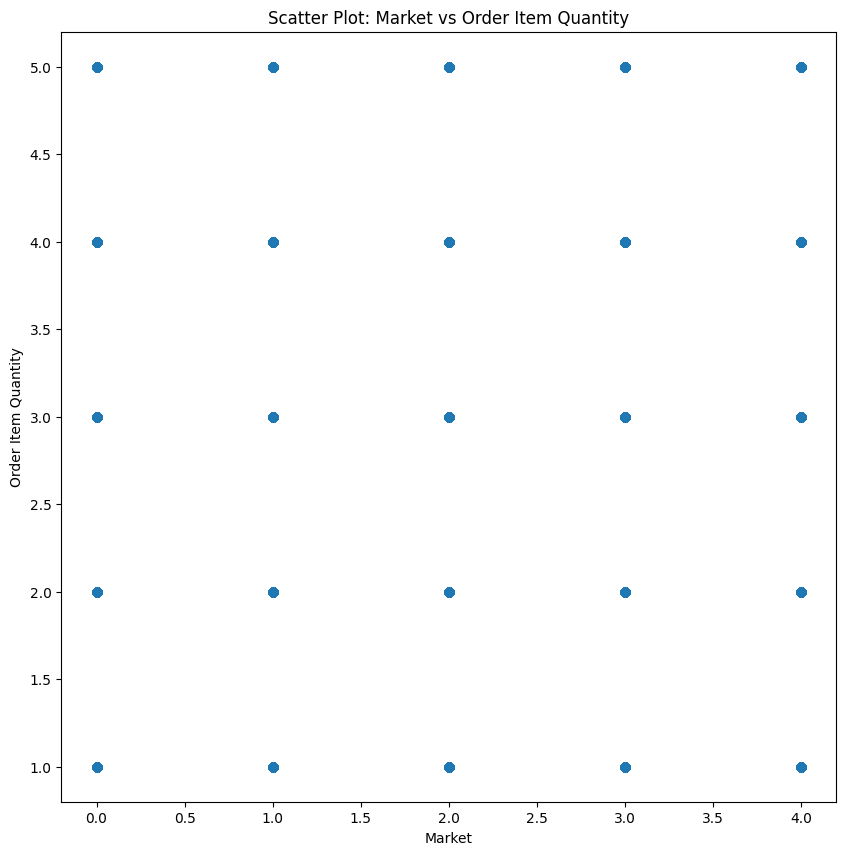

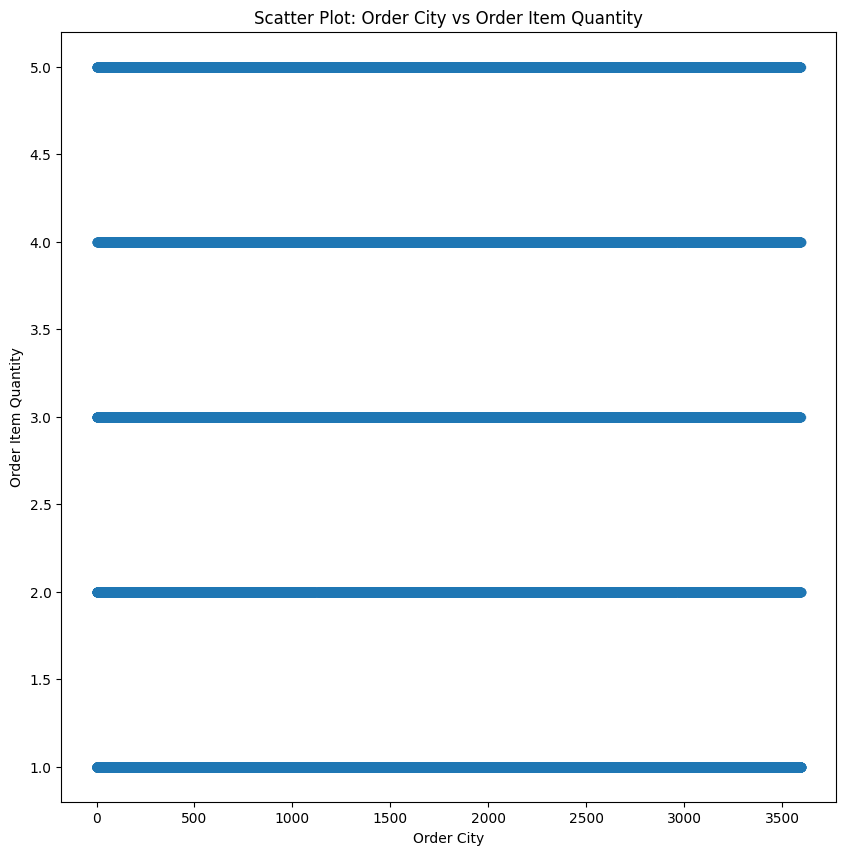

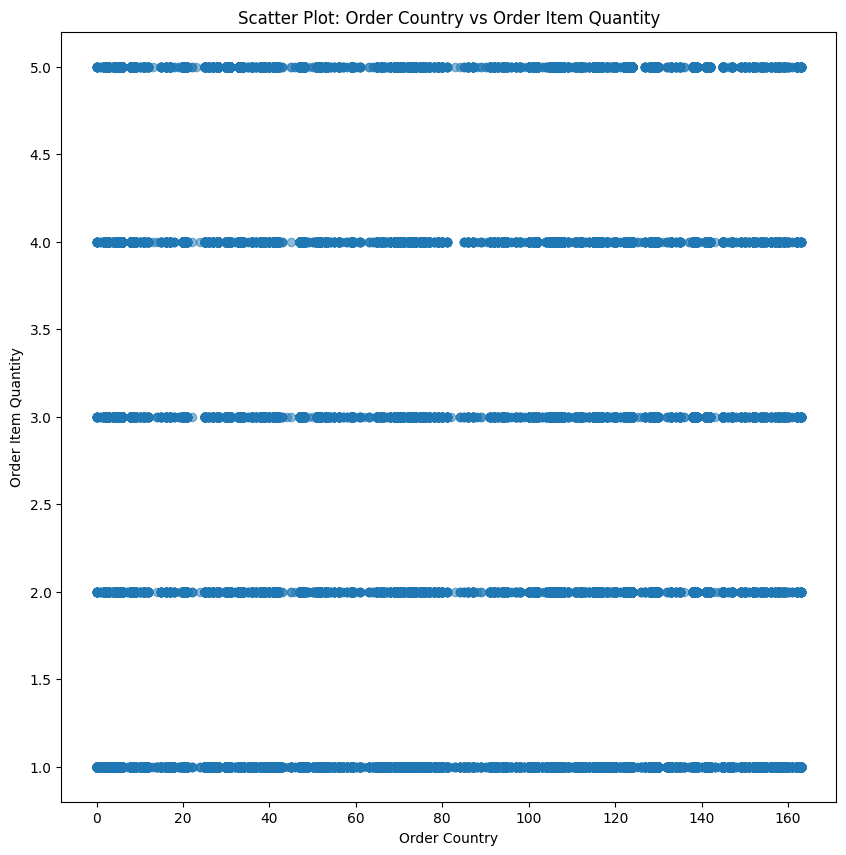

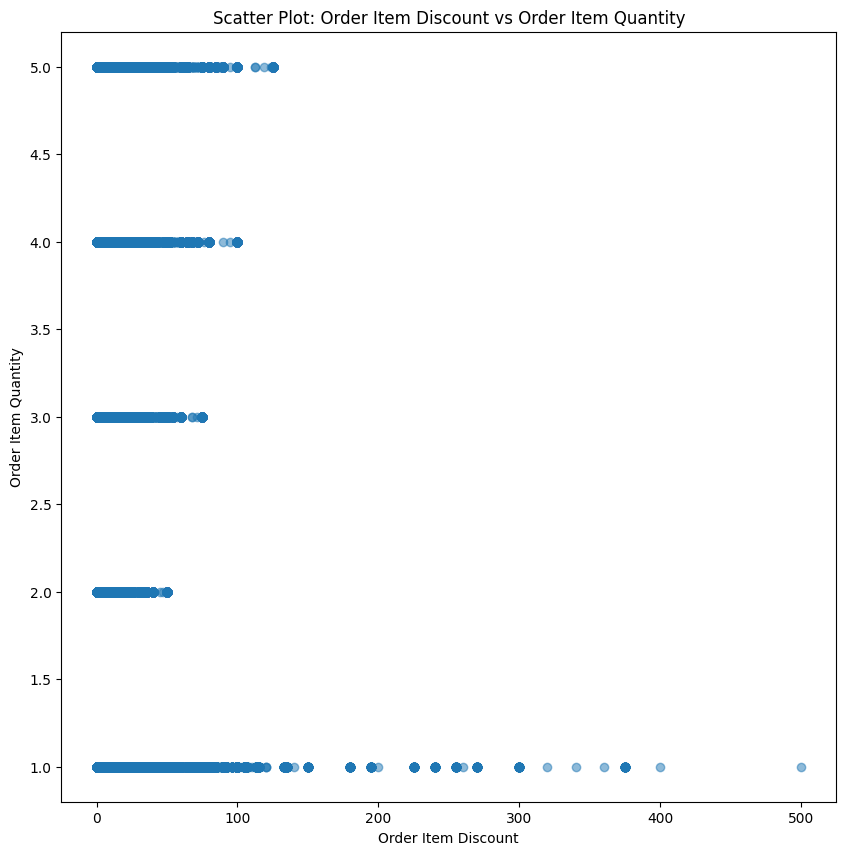

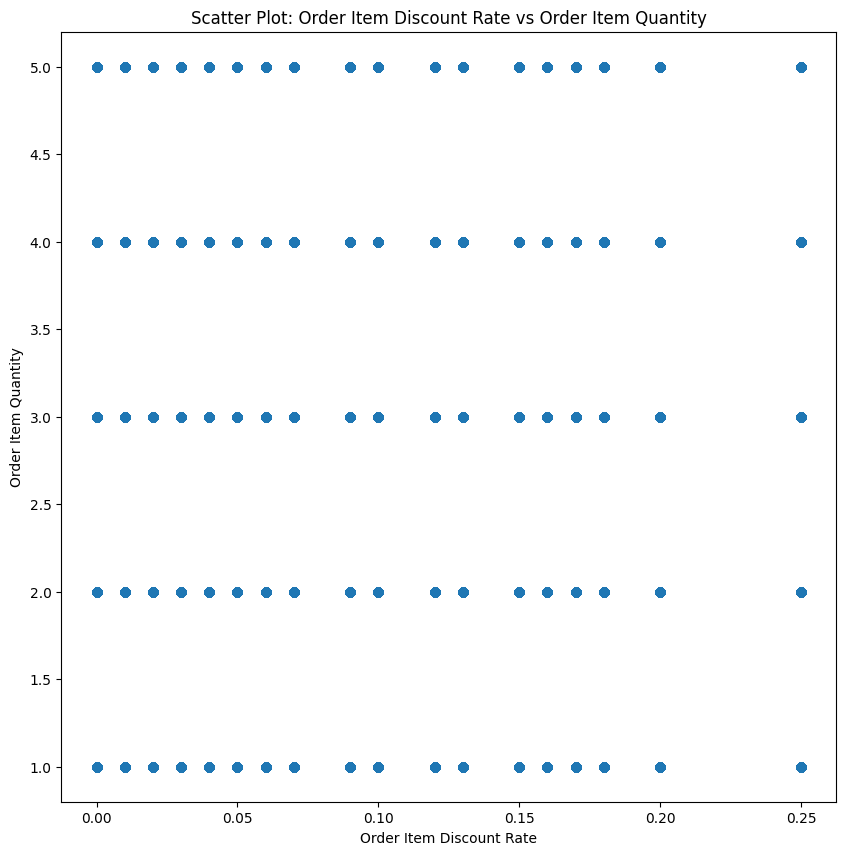

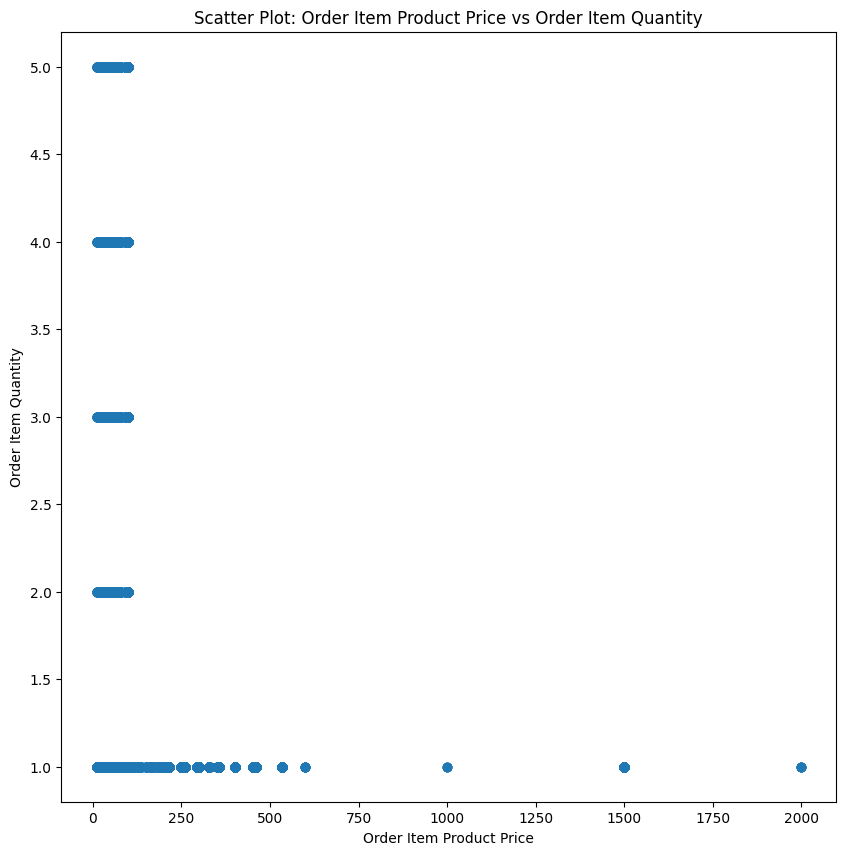

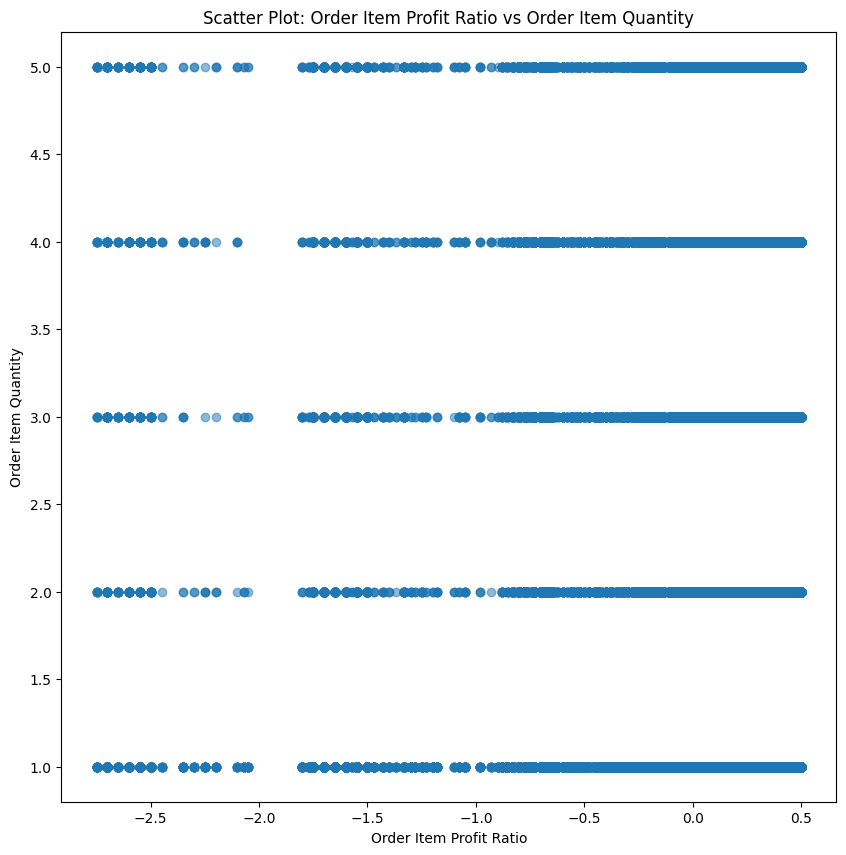

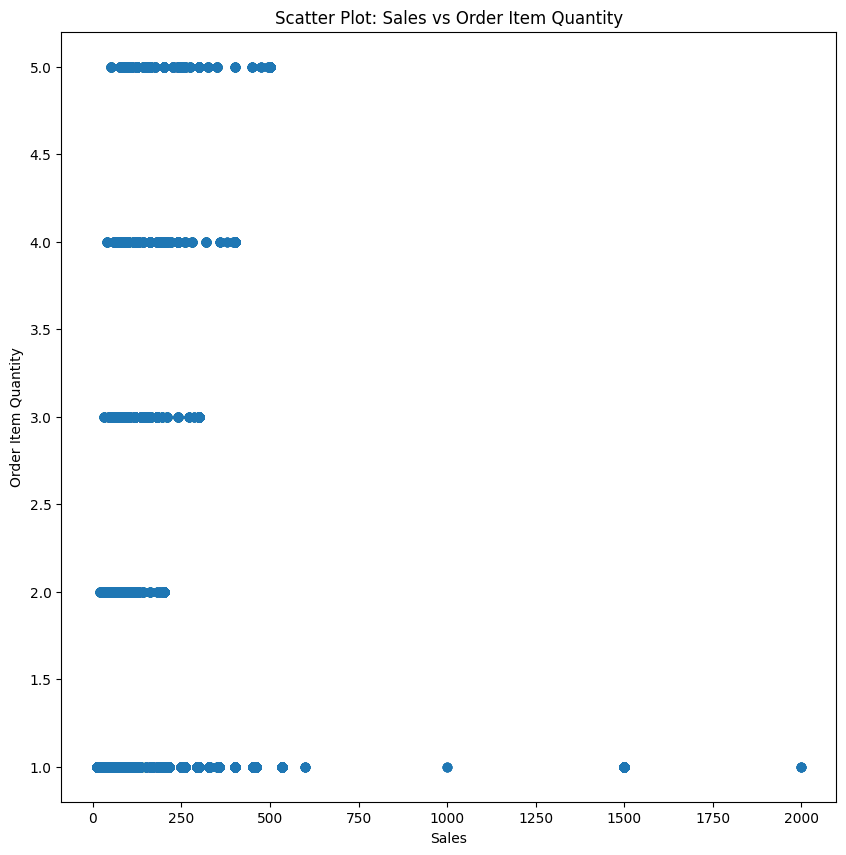

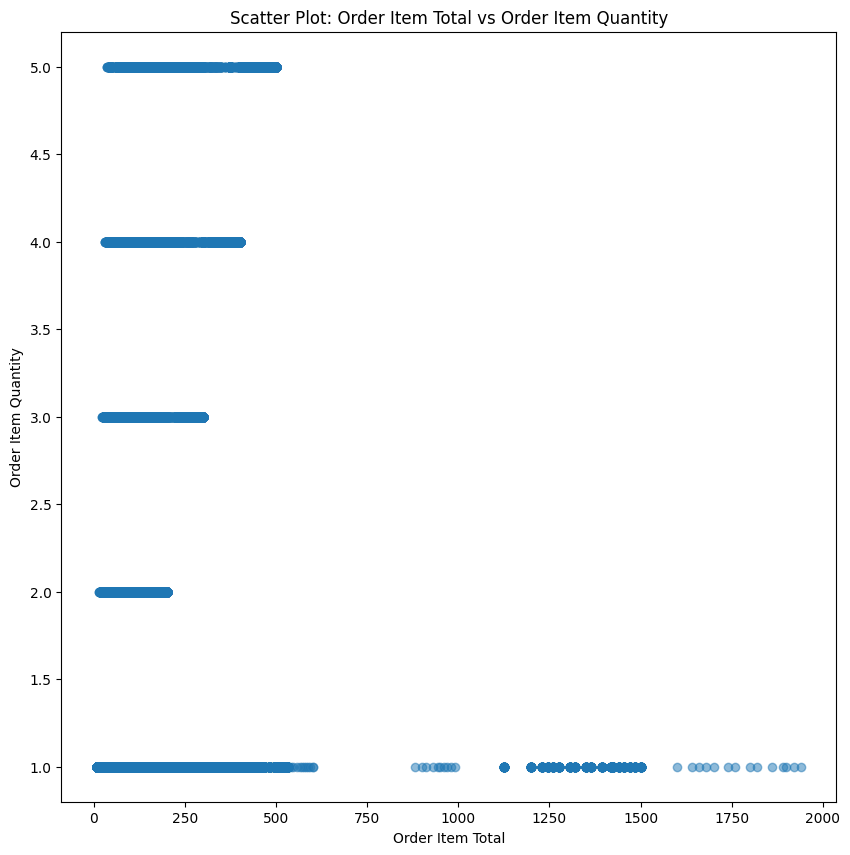

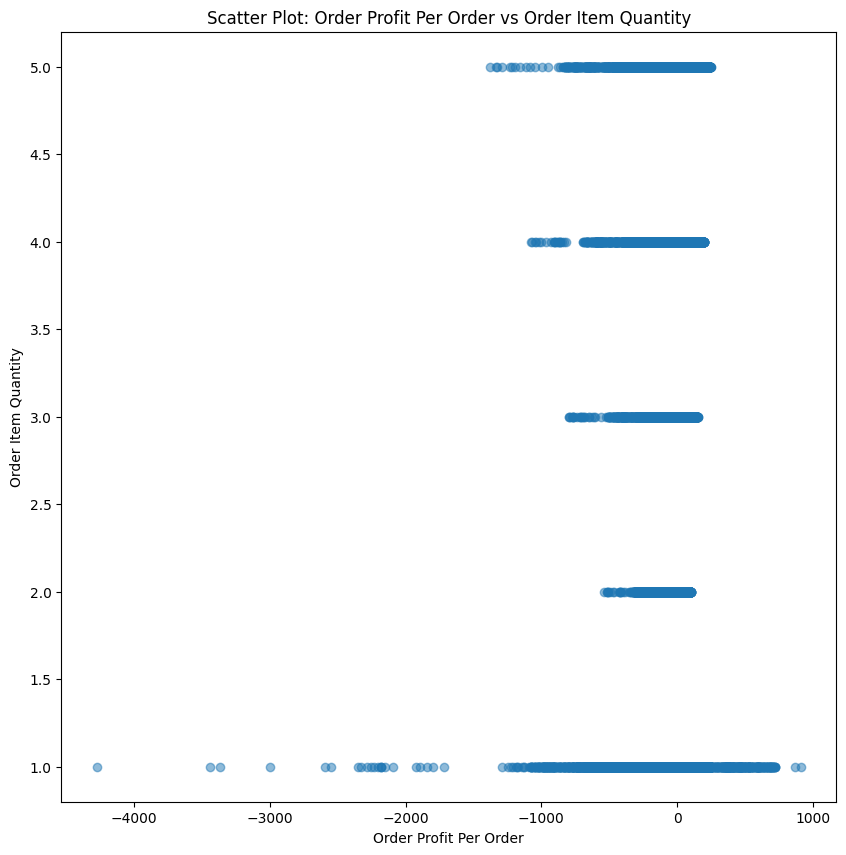

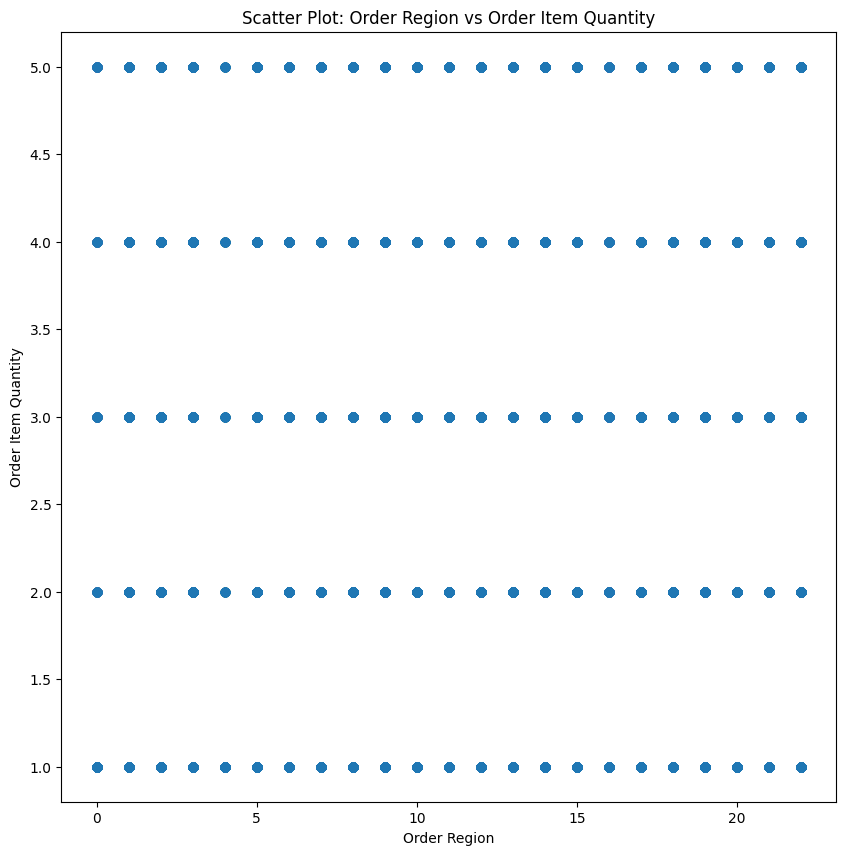

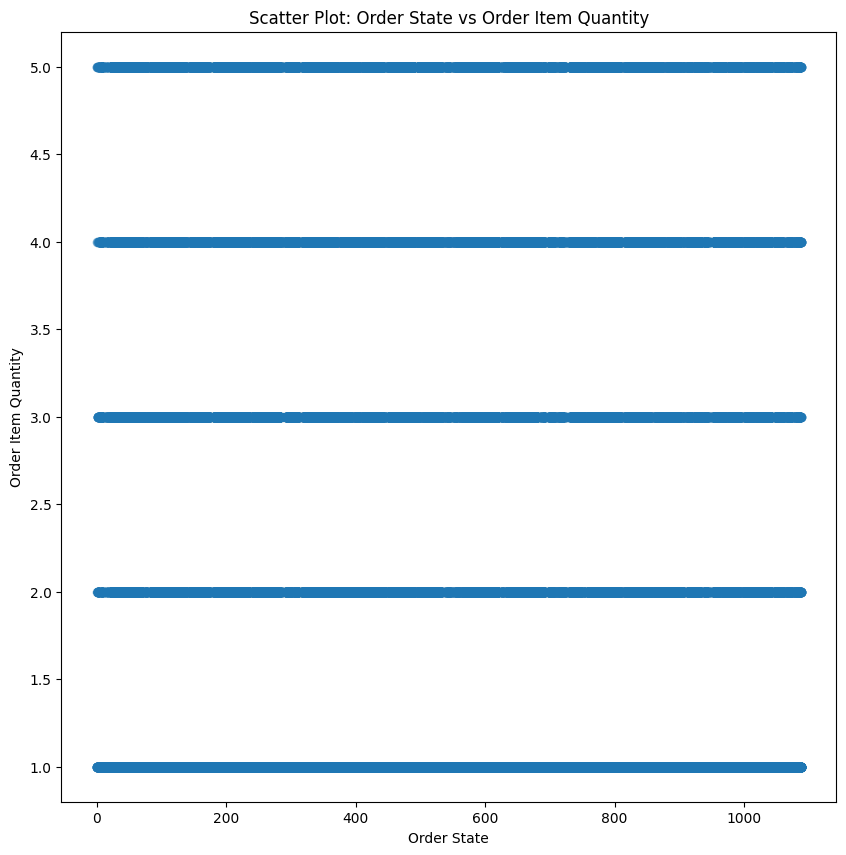

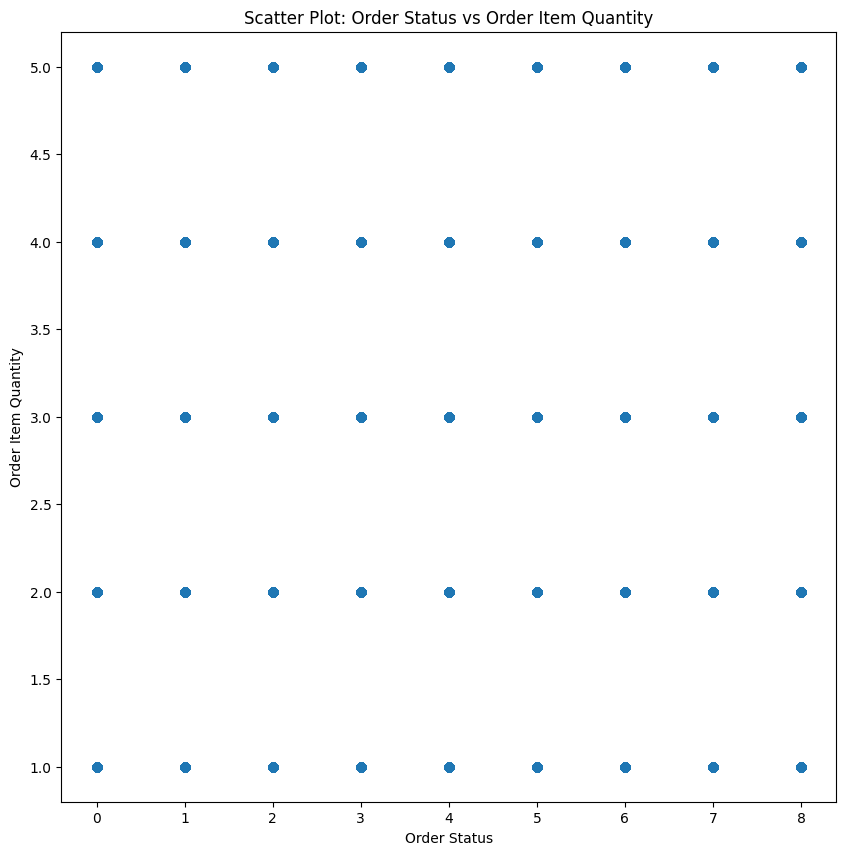

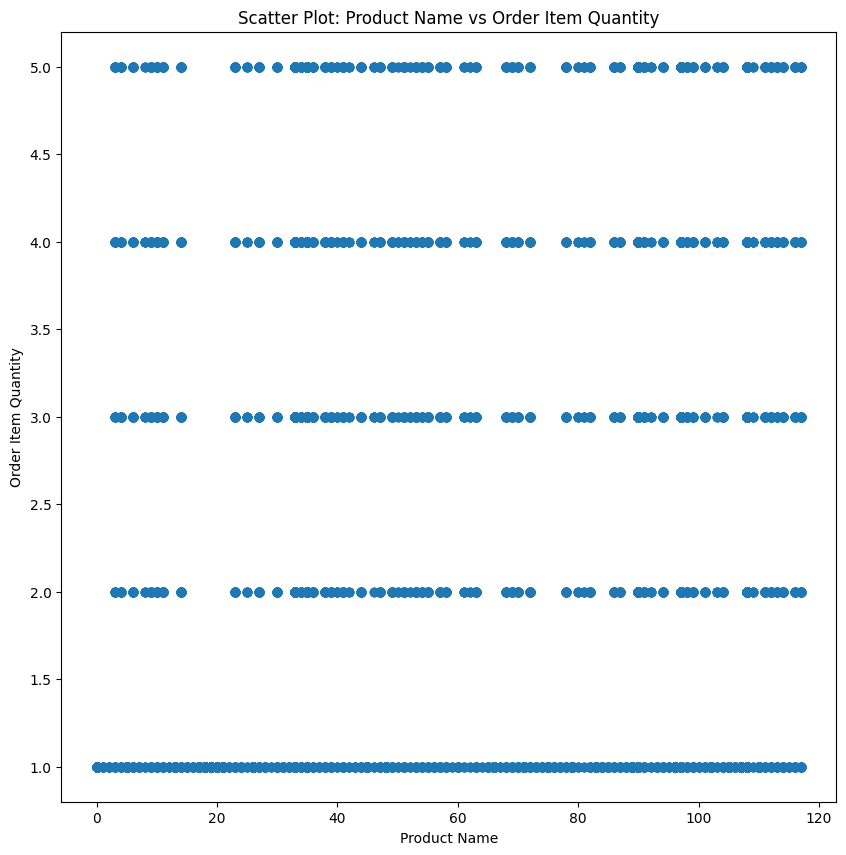

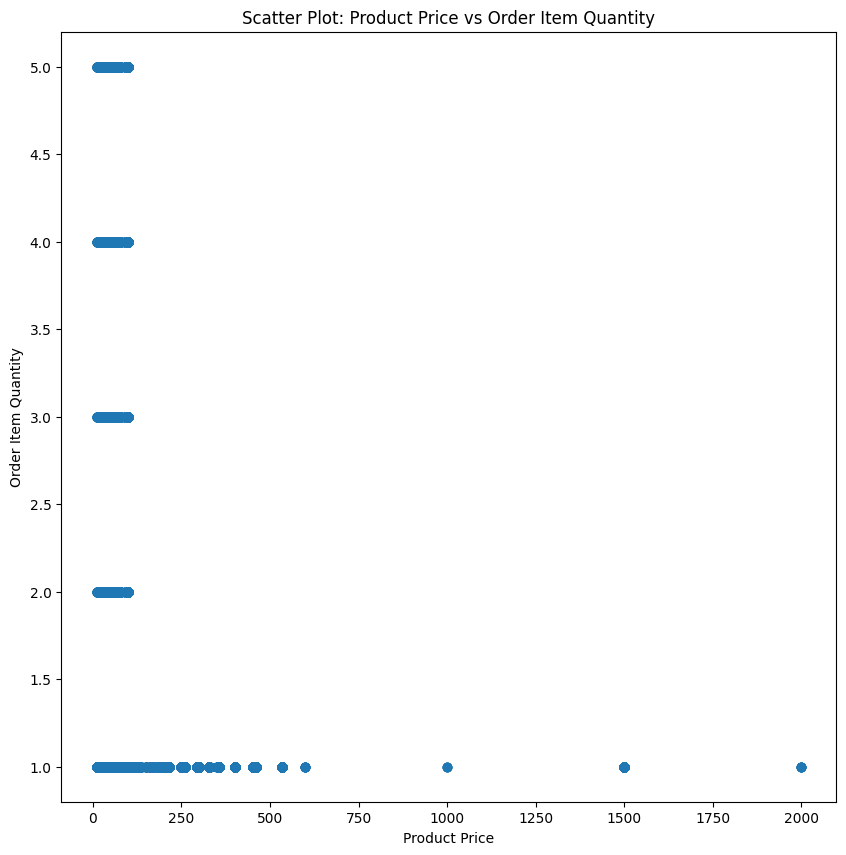

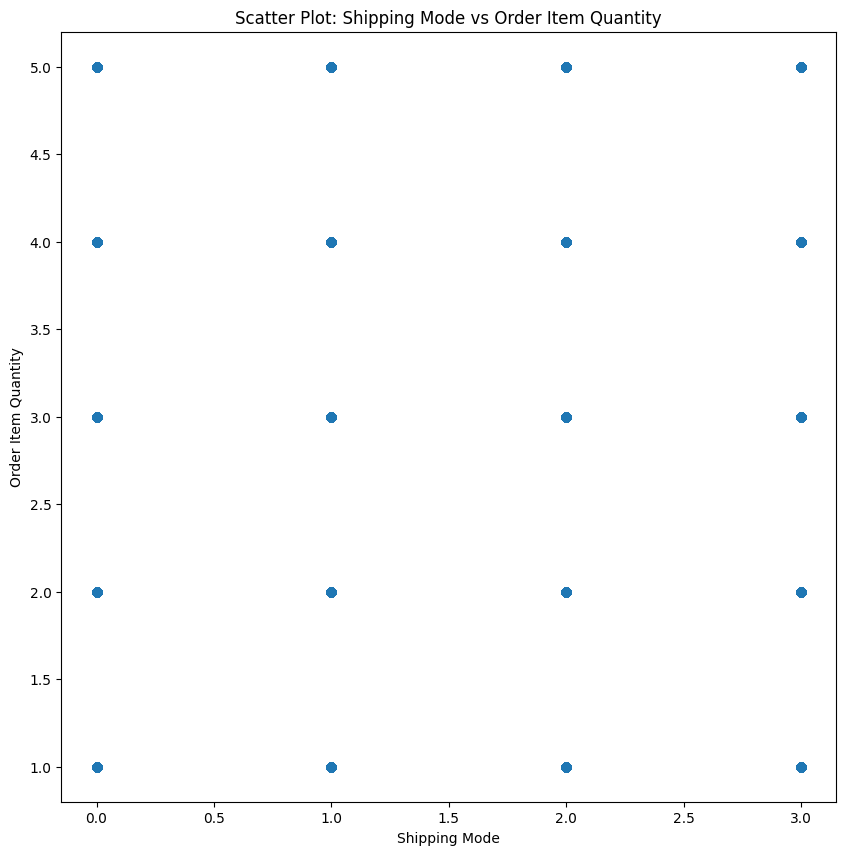

In [18]:
import matplotlib.pyplot as plt

# Replace 'y_column' with the actual y-column you want to use
y_column = 'Order Item Quantity'

# Select all features as x-columns by dropping the y-column
x_columns_to_plot = new_data.drop(columns=[y_column]).columns

# Iterate over x-columns and create separate scatter plots
for x_column in x_columns_to_plot:
    plt.figure(figsize=(10, 10))
    plt.scatter(new_data[x_column], new_data[y_column], alpha=0.5)
    plt.title(f'Scatter Plot: {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Model build:-

**1)multiple linear reg:**

In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Select features and target variable
features = new_data.drop(['Order Item Quantity'], axis=1)
target = new_data['Order Item Quantity']


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize features (optional but can be beneficial for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


removing outliers:

In [21]:
# Analyze residuals and identify outliers
residuals = y_test - y_pred
outlier_threshold = 0.5  # You can adjust this threshold based on your requirements

# Identify outliers
outliers = np.abs(residuals) > outlier_threshold

# Display the number of outliers
print(f'Number of outliers before removal: {sum(outliers)}')

# Remove outliers from the test set
X_test_no_outliers = X_test[~outliers]
y_test_no_outliers = y_test[~outliers]

# Make predictions on the test set without outliers
y_pred_no_outliers = model.predict(scaler.transform(X_test_no_outliers))

# Evaluate the model performance without outliers
mse_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
print(f'Mean Squared Error without outliers: {mse_no_outliers}')

r2_no_outliers = r2_score(y_test_no_outliers, y_pred_no_outliers)
print(f'R-squared without outliers: {r2_no_outliers}')

Number of outliers before removal: 7570
Mean Squared Error without outliers: 0.048784691020526474
R-squared without outliers: 0.9567774558717792


suitable for bi

**2.random forest reg:**

Mean Squared Error on Test Set: 2.9165743407932593e-06
R-squared on Test Set: 0.9999986254397942


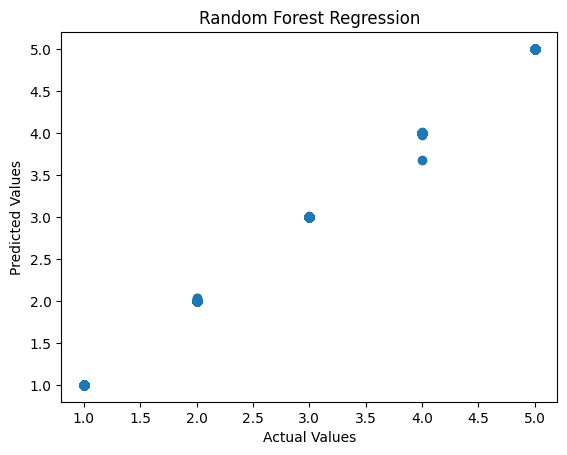

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Assuming your dataset has features and a target column
X2 = new_data.drop('Order Item Quantity', axis=1)  # Exclude the target column from features
y2 = new_data['Order Item Quantity']

# Split the data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model2.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred2 = rf_model2.predict(X_test2)

# Evaluate the model
mse2 = mean_squared_error(y_test2, y_pred2)
r22 = r2_score(y_test2, y_pred2)

print(f'Mean Squared Error on Test Set: {mse2}')
print(f'R-squared on Test Set: {r22}')

# Visualize the results
plt.scatter(y_test2, y_pred2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression')
plt.show()

**3.Gradiant boost trees**

Mean Squared Error on Test Set: 0.003968813881823794
R-squared on Test Set: 0.9981295269762983


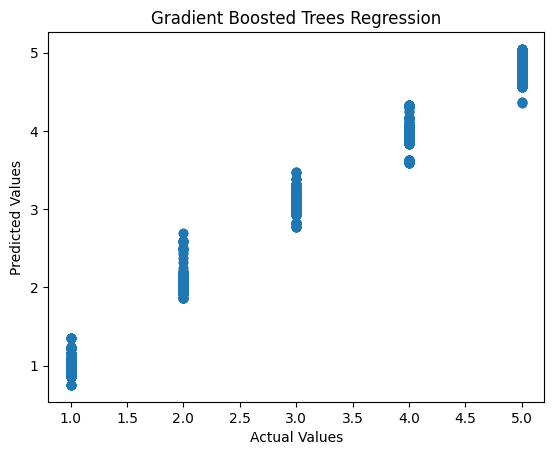

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming your dataset has features and a target column
X3 = new_data.drop('Order Item Quantity', axis=1) # Exclude the target column from features
y3 = new_data['Order Item Quantity']

# Split the data into training and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
gb_model3 = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model3.fit(X_train3, y_train3)

# Make predictions on the test set
y_pred3 = gb_model3.predict(X_test3)

# Evaluate the model
mse3 = mean_squared_error(y_test3, y_pred3)
r23 = r2_score(y_test3, y_pred3)

print(f'Mean Squared Error on Test Set: {mse3}')
print(f'R-squared on Test Set: {r23}')

# Visualize the results
plt.scatter(y_test3, y_pred3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosted Trees Regression')
plt.show()